[0, 5, 2, 7, 1]


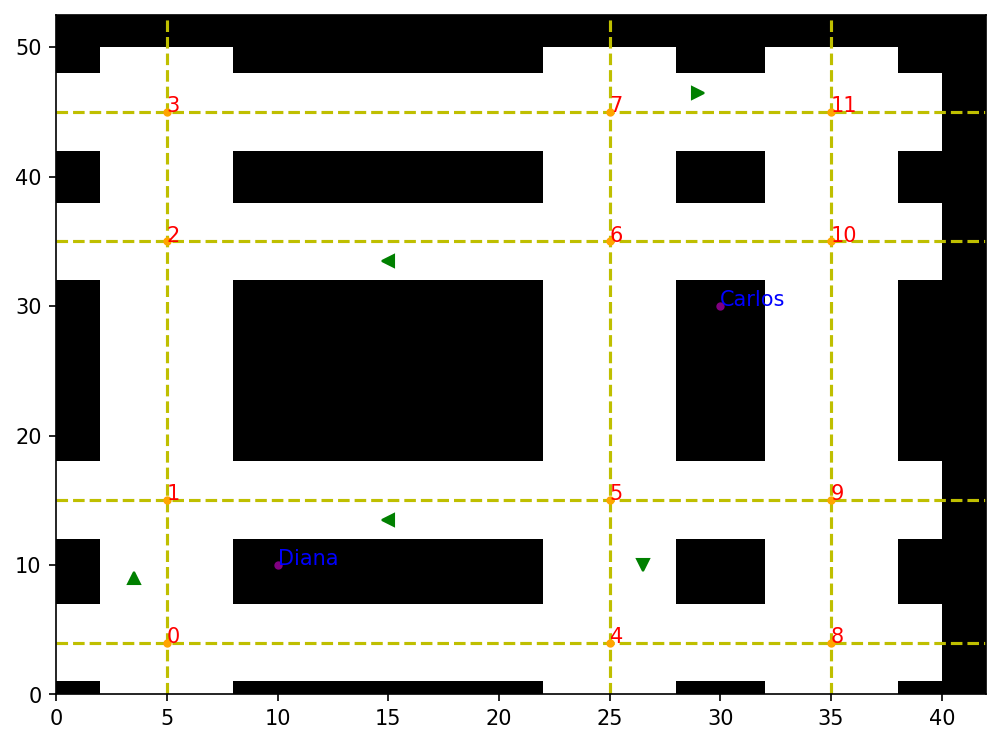

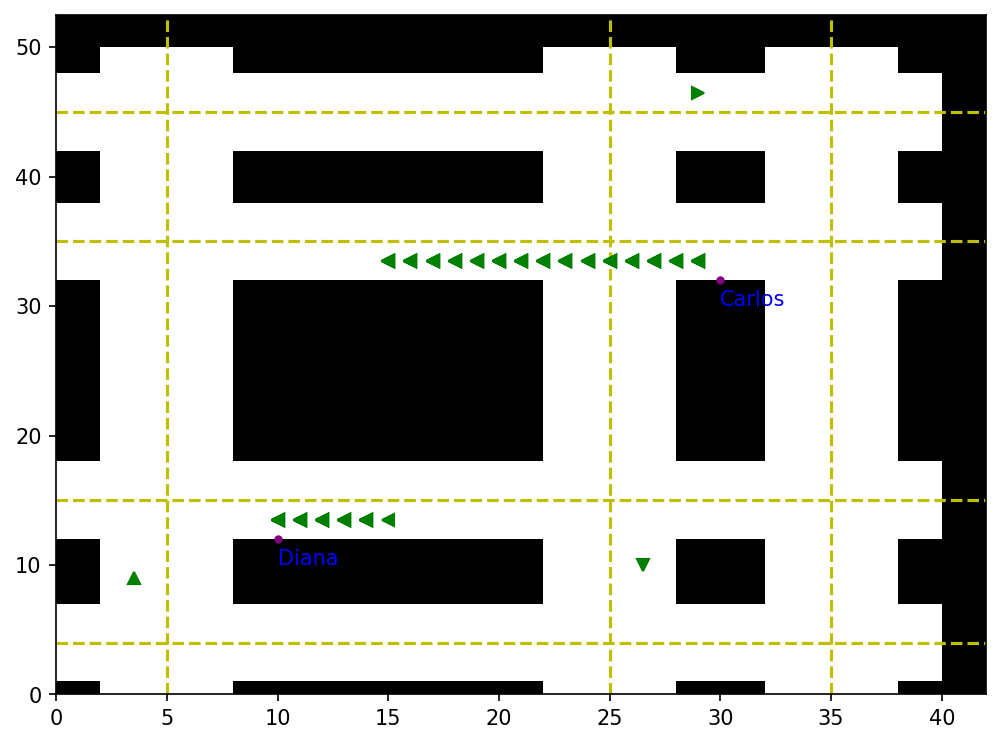

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import configparser
import time
import pandas as pd

l=6
class cidade:
    def __init__(self,tam_horizontal, tam_vertical, nhorizontal,nvertical, rua_horizontal=[],rua_vertical=[]):
        self.tam_horizontal=tam_horizontal
        self.tam_vertical=tam_vertical
        self.nhorizontal=nhorizontal
        self.nvertical=nvertical
        self.rua_horizontal=rua_horizontal
        self.rua_vertical=rua_vertical
        #self.l=6

    def tam_rua(self):
        self.data=[]
        self.data.append([self.tam_horizontal for i in range(self.nhorizontal)])
        self.data.append([self.tam_vertical for i in range(self.nvertical)])
        return self.data
    
    def cruzamento(self):
        self.cruz=[]
        for i in range(self.nvertical):
            for j in range(self.nhorizontal):
                self.cruz.append([self.rua_vertical[i],self.rua_horizontal[j]])
        return self.cruz

class passageiro:
    def __init__(self,nome,xlocal,ylocal,xdestino,ydestino):
        self.nome=nome
        self.xlocal=xlocal
        self.ylocal=ylocal
        self.xdestino=xdestino
        self.ydestino=ydestino
        
    def localdepartida(self,ruas=[]):
        self.xlocaldepartida=ruas.tam_horizontal
        self.ylocaldepartida=ruas.tam_vertical
       
    
        for j in range(ruas.nvertical):
            if abs(self.xlocal-ruas.rua_vertical[j]+l/2) <= abs(self.xlocal-self.xlocaldepartida):
                self.xlocaldepartida=ruas.rua_vertical[j]-l/2
                aux=j
            elif abs(self.xlocal-ruas.rua_vertical[j]-l/2) <= abs(self.xlocal-self.xlocaldepartida):
                self.xlocaldepartida=ruas.rua_vertical[j]+l/2
                aux=j

        for j in range(ruas.nhorizontal):
            if abs(self.xlocal-ruas.rua_horizontal[j]+l/2) <= abs(self.ylocal-self.ylocaldepartida):
                self.ylocaldepartida=ruas.rua_horizontal[j]-l/2
                aux=j
            elif abs(self.xlocal-ruas.rua_horizontal[j]-l/2) <= abs(self.ylocal-self.ylocaldepartida):
                self.ylocaldepartida=ruas.rua_horizontal[j]+l/2
                aux=j
        
            if abs(self.ylocaldepartida-ruas.rua_horizontal[aux])< abs(self.xlocaldepartida-ruas.rua_vertical[aux]):
                self.xlocaldepartida=self.xlocal
            elif abs(self.ylocaldepartida-ruas.rua_horizontal[aux])< abs(self.xlocaldepartida-ruas.rua_vertical[aux]):
                self.ylocaldepartida=self.ylocal
        return self.xlocaldepartida, self.ylocaldepartida


class carro:
    def __init__(self,hv,rua,direcao,posicao):
        self.hv=hv
        self.rua=rua
        self.direcao=direcao
        self.posicao=posicao
        self.disponivel=0
        
    def inicial(self,ruas=[]):
        if self.hv=='h':
            if self.direcao==1:
                    self.ylocal_in=ruas.rua_horizontal[self.rua-1]-l/4
            elif self.direcao==2:
                    self.ylocal_in=ruas.rua_horizontal[self.rua-1]+l/4
            self.xlocal_in=self.posicao
        elif self.hv=='v':
            if self.direcao==1:
                self.xlocal_in=ruas.rua_vertical[self.rua-1]-l/4
            elif self.direcao==2:
                self.xlocal_in=ruas.rua_vertical[self.rua-1]+l/4
            self.ylocal_in=self.posicao
        return self.xlocal_in,self.ylocal_in
    
    
    def local(self,ruas=[],rua_=[],hv_=[],direcao_=[],posicao_=[]):
        self.hv_=hv_
        self.rua_=rua_
        self.direcao_=direcao_
        self.posicao_=posicao_
        self.xlocal=[]
        self.ylocal=[]
        
        for i in range(len(self.rua_)):
            if self.hv_[i]=='h':
                if self.direcao_[i]==1:
                        self.ylocal.append(ruas.rua_horizontal[self.rua_[i]-1]-l/4)
                elif self.direcao_[i]==2:
                        self.ylocal.apppend(ruas.rua_horizontal[self.rua_[i]-1]+l/4)
                self.xlocal.append(self.posicao_[i])
            elif self.hv_[i]=='v':
                if self.direcao_[i]==1:
                    self.xlocal.append(ruas.rua_vertical[self.rua_[i]-1]-l/4)
                elif self.direcao_[i]==2:
                    self.xlocal.append(ruas.rua_vertical[self.rua_[i]-1]+l/4)
                self.ylocal.append(self.posicao_)
                
        return self.xlocal,self.ylocal
    #def disponivel(self,controle):
    #    return  #sem passageiro
    
    #sem passageiro: estacionado(não atrapalha o transito)
    #velocidade máxima
    #velocidade constante e discreta, controlada a partir da central
    #localizador(envia pra central)
    #envia periodicamente sua velocidade para central
    #distância segura um carro do outro
    
    
class central_de_controle:#mqtt
    def __init__(self,cidade,passageiro,carro=[]):
        self.distancia=cidade.tam_horizontal*cidade.tam_vertical
        self.cid=cidade
        self.carro=carro
        self.passageiro=passageiro
        #self.carrodisponivel=[0 for i in range(len(carro))]#0->carro disponível,1->carro sendo utilizado
    def escolhecarro(self):
        aux=0
        for j in range(len(self.carro)):
            x,y=self.carro[j].inicial(self.cid)
            #print(((self.passageiro.xlocal-x)**2 + (self.passageiro.ylocal-y)**2)**(1/2))
            if self.distancia>((self.passageiro.xlocal-x)**2 + (self.passageiro.ylocal-y)**2)**(1/2):# and self.carrodisponivel[j]==0:
                self.distancia=((self.passageiro.xlocal-x)**2 + (self.passageiro.ylocal-y)**2)**(1/2)
                self.carroescolhido=j
                #aux=1
    
            #if j==len(self.carro) and aux==1 :
            #    self.carrodisponivel[j]=1
        return self.carroescolhido#, self.carrodisponivel
    
    def cruzamentoperto(self,car):
        x,y=car.inicial(self.cid)
        xaux,yaux=self.cid.tam_horizontal*self.cid.tam_vertical,self.cid.tam_horizontal*self.cid.tam_vertical
        for j in range(len(self.cid.cruzamento())):
            xc,yc=self.cid.cruzamento()[j]
            if (xaux**2+yaux**2)**(1/2)>((x-xc)**2+(y-yc)**2)**(1/2):
                xaux=(x-xc)
                yaux=(y-yc)
                taux=j  
        return self.cid.cruzamento()[taux]

    
    def escolhe_rota(self,carroescolhido):
        x,y=self.carro[carroescolhido].inicial(self.cid)
        xp,yp=self.passageiro.localdepartida(self.cid)
        self.rotax=[]
        self.rotay=[]
    
        for i in range(len(self.cid.cruzamento())):
            if x<=cid.cruzamento()[i][0]+l/2 and x>=cid.cruzamento()[i][0]-l/2 and y<=cid.cruzamento()[i][1]+l/2 and y>=cid.cruzamento()[i][1]-l/2:
                aux=0
            else:#if x>cid.cruzamento()[i][0]+l/2 and x<cid.cruzamento()[i][0]-l/2 and y>cid.cruzamento()[i][1]+l/2 and y<cid.cruzamento()[i][1]-l/2:
                #np.arange(start=1, stop=10, step=3)
                #self.rotax.append(np.arange(x, ,0.5))
                #self.rotay.append(np.arange(y, ,0.5))
                
                if self.carro[carroescolhido].hv == 'h':
                   # if abs(x-cid.cruzamento()[i][1]+l/2)>abs(x-xp) and abs(x-cid.cruzamento()[i][1]-l/2)>abs(x-xp): 
                    if yp==y+l/4 or yp==y-l/4 or yp==y+3*l/4 or yp==y-3*l/4:
                        if x<xp:
                            self.rotax.append(np.arange(x,xp,1))
                        else:
                            self.rotax.append(np.arange(xp,x,1))
                
                    elif y<=cid.cruzamento[i][1]+l/2 and y>=cid.cruzamento[i][1]-l/2:
                        if self.carro[carroescolhido].direcao==1:#<
                                if x < self.cid.cruzamento[i][0]:
                                    self.rotax.append(np.arange(x,self.cid.cruzamento[i][0],0.5))
                                    print(1)
                                    break
                                elif x > self.cid.cruzamento[i][0]:
                                    self.rotax.append(np.arange(x,self.cid.cruzamento[i][0],0.5))
                                    break
                        elif self.carro[carroescolhido].direcao==2:#>
                            
                                if x>self.cid.cruzamento[i][0]:
                                    self.rotax.append(np.arange(x,self.cid.cruzamento[i][0],0.5))
                                    break
                                elif x < self.cid.cruzamento[i][0]:
                                    self.rotax.append(np.arange(x,self.cid.cruzamento[i][0],0.5))
                                    break
                    self.rotay.append(y)
                elif self.carro[carroescolhido].hv =='v':
                    if xp==x+l/4 or xp==x-l/4 or xp==x+3*l/4 or xp==x-3*l/4 :
                        self.rotax.append(np.arange(x,xp,0.5))
                    elif self.carro[carroescolhido].direcao==1:#^
                        
                            self.carro[carroescolhido].direcao=2
                            print(self.carro[carroescolhido].direcao)
                            if y < self.cid.cruzamento[i][1]:
                                self.rotay.append(np.arange(y,self.cid.cruzamento[i][1],0.5))
                                break
                            elif y > self.cid.cruzamento[i][1]:
                                self.rotay.append(np.arange(y,self.cid.cruzamento[i][1],0.5))
                                break
                    elif self.carro[self.carroescolhido].direcao==2:#v
                            if y > self.cid.cruzamento[i][1]:
                                self.rotay.append(np.arange(y,self.cid.cruzamento[i][1],0.5))
                                break
                            elif y < self.cid.cruzamento[i][1]:
                                self.rotay.append(np.arange(y,self.cid.cruzamento[i][1],0.5))
                                break
                    self.rotax.append(x)             

        return self.rotax,self.rotay
    
    
            
                              



    #recebe mensagem do passageiro a necessidade de transporte: escolhe carro vazio e mais perto do passageiro: manda o carro ir 
    #recebe mensagem do passageiro da localização do destino: calcula a melhor rota: transmite ao carro
    #recebe do carro que chegou na localização: carro estacionado 
    #recolhe o histórico de velocidade 

      
config = configparser.ConfigParser()
config.read("teste_uber.ini")

p=[config['PESSOA'][i].split(",") for i in config['PESSOA']]
pessoas=[passageiro(p[i][0],int(p[i][1]),int(p[i][2]),int(p[i][3]),int(p[i][4])) for i in range(len(p))]

c=[config['CARRO'][i].split(",") for i in config['CARRO']]
carros=[carro(c[i][0],int(c[i][1]),int(c[i][2]),int(c[i][3])) for i in range(len(c))]

r=[config['CIDADE'][i].split(",") for i in config['CIDADE']]
cid=cidade(int(r[0][0]),int(r[0][1]),len(r[1]),len(r[2]),[int(r[1][i]) for i in range(len(r[1]))],[int(r[2][i]) for i in range(len(r[2]))])


t=[0 for i in range(len(carros))]
for i in range(len(carros)):
    taux=0
    x,y=carros[i].inicial(cid)
    xaux,yaux=cid.tam_horizontal*cid.tam_vertical,cid.tam_horizontal*cid.tam_vertical
    for j in range(len(cid.cruzamento())):
        xc,yc=cid.cruzamento()[j]
        if (xaux**2+yaux**2)**(1/2)>((x-xc)**2+(y-yc)**2)**(1/2):
            xaux=(x-xc)
            yaux=(y-yc)
            taux=j  
    t[i]=taux
print(t)
            
        
        
    

#Parte visível do programa

plt.figure(figsize=(8, 6), dpi=150);
ax = plt.axes(); 
ax.set_facecolor("Black"); 
plt.barh(cid.rua_horizontal, cid.tam_rua()[0],l, color="white");
plt.bar(cid.rua_vertical, cid.tam_rua()[1],l, color="white");
for i in range(cid.nhorizontal) :
    plt.axhline(cid.rua_horizontal[i], linestyle='--', color="y");
for i in range(cid.nvertical) :
    plt.axvline(cid.rua_vertical[i], linestyle="--", color="y");
for i in range(len(pessoas)):
    ax.text(pessoas[i].xlocal,pessoas[i].ylocal,pessoas[i].nome,color='b')
    plt.plot(pessoas[i].xlocal,pessoas[i].ylocal,'.', color='purple');
#  plt.plot(destinox[i] ,destinoy[i],'.', color='violet');
#  plt.plot(x[i] ,y[i],'.', color='y');

for i in range(len(cid.cruzamento())):
    plt.plot(cid.cruzamento()[i][0],cid.cruzamento()[i][1],'.',color='orange')
    ax.text(cid.cruzamento()[i][0],cid.cruzamento()[i][1],i,color='r')

for i in range(len(carros)):
    x,y=carros[i].inicial(cid)
    if carros[i].hv == 'h':
        if carros[i].direcao==1:
            plt.plot(x,y,'<', color='g');
        elif carros[i].direcao==2:
            plt.plot(x,y,'>', color='g');
    elif carros[i].hv =='v':
        if carros[i].direcao==1:
            plt.plot(x,y,'^', color='g');
        elif carros[i].direcao==2:
            plt.plot(x,y,'v', color='g');

plt.subplot()

plt.figure(figsize=(8, 6), dpi=150);
ax = plt.axes(); 
ax.set_facecolor("Black"); 
plt.barh(cid.rua_horizontal, cid.tam_rua()[0],l, color="white");
plt.bar(cid.rua_vertical, cid.tam_rua()[1],l, color="white");
for i in range(cid.nhorizontal) :
    plt.axhline(cid.rua_horizontal[i], linestyle='--', color="y");
for i in range(cid.nvertical) :
    plt.axvline(cid.rua_vertical[i], linestyle="--", color="y");
for i in range(len(pessoas)):
    x,y=pessoas[i].localdepartida(cid)
    ax.text(pessoas[i].xlocal,pessoas[i].ylocal,pessoas[i].nome,color='b')
    plt.plot(x,y,'.', color='purple');
    
for i in range(len(carros)):
    x,y=carros[i].inicial(cid)
    
    if carros[i].hv == 'h':
        if carros[i].direcao==1:
            plt.plot(x,y,'<', color='g');
        elif carros[i].direcao==2:
            plt.plot(x,y,'>', color='g');
    elif carros[i].hv =='v':
        if carros[i].direcao==1:
            plt.plot(x,y,'^', color='g');
        elif carros[i].direcao==2:
            plt.plot(x,y,'v', color='g');
for i in range(len(pessoas)):
    aux=central_de_controle(cid,pessoas[i],carros).escolhecarro()
    x,y=central_de_controle(cid,pessoas[i],carros).escolhe_rota(aux)
    if carros[aux].hv == 'h':
        if carros[aux].direcao==1:
            plt.plot(x,y,'<', color='g');
        elif carros[aux].direcao==2:
            plt.plot(x,y,'>', color='g');
    elif carros[aux].hv =='v':
        if carros[aux].direcao==1:
            plt.plot(x,y,'^', color='g');
        elif carros[aux].direcao==2:
            plt.plot(x,y,'v', color='g');
    